# Count number of rows for each label

In [1]:


# Import required libraries
import gdown
import pandas as pd

# Step 1: Download the CSV file
url = "https://drive.google.com/uc?id=1O-CpsaV9kfQbO_mo4XHgf55VMNPVEAbY"
output = "dataset.csv"
gdown.download(url, output, quiet=False)

# Step 2: Read the CSV
df = pd.read_csv(output)

# Step 3: Display first few rows (optional)
print(df.head())

# Step 4: Count rows for each label
label_counts = df['label'].value_counts()
print("Counts for each label:")
print(label_counts)

Downloading...
From (original): https://drive.google.com/uc?id=1O-CpsaV9kfQbO_mo4XHgf55VMNPVEAbY
From (redirected): https://drive.google.com/uc?id=1O-CpsaV9kfQbO_mo4XHgf55VMNPVEAbY&confirm=t&uuid=d1482285-16a4-48b5-99f0-bc58f8e33970
To: /content/dataset.csv
100%|██████████| 254M/254M [00:02<00:00, 125MB/s]


                                         image_path1  \
0  MLP_dataset/Positive_FGNET/person001/person001...   
1  MLP_dataset/Positive_FGNET/person001/person001...   
2  MLP_dataset/Positive_FGNET/person001/person001...   
3  MLP_dataset/Positive_FGNET/person001/person001...   
4  MLP_dataset/Positive_FGNET/person001/person001...   

                                         image_path2      age1       age2  \
0  MLP_dataset/Positive_FGNET/person001/person001...  4.660048  27.186808   
1  MLP_dataset/Positive_FGNET/person001/person001...  4.660048  20.907551   
2  MLP_dataset/Positive_FGNET/person001/person001...  4.660048  31.123674   
3  MLP_dataset/Positive_FGNET/person001/person001...  4.660048  23.976097   
4  MLP_dataset/Positive_FGNET/person001/person001...  4.660048  34.156021   

                                          embedding1  \
0  [-2.14421488e-02  4.52129766e-02  2.54299995e-...   
1  [-2.14421488e-02  4.52129766e-02  2.54299995e-...   
2  [-2.14421488e-02  4.52129766e

# Count number of rows for each person_id

In [2]:
# Step 2: Read CSV
df = pd.read_csv(output)

# Step 3: Filter rows with label 1
df_label1 = df[df['label'] == 1]

# Step 4: Count number of rows per person_id
person_counts = df_label1['person_id'].value_counts().sort_index()

# Step 5: Display the result
print("Number of rows for each person_id (label 1):")
print(person_counts)

Number of rows for each person_id (label 1):
person_id
1       3
2       3
3       6
4       1
5      15
       ..
366    15
367     6
368     9
369     3
370    22
Name: count, Length: 370, dtype: int64


In [3]:
# Filter person_ids with counts greater than 50
persons_over_50 = person_counts[person_counts > 50]

# Display the result
print("Person IDs with more than 50 rows (label 1):")
print(persons_over_50)


Person IDs with more than 50 rows (label 1):
person_id
25     171
42     210
50      78
59     253
72     903
95      55
101    190
102    210
112     55
127     66
132    105
137    120
140    153
141    276
142     55
159    120
187     66
216    595
236    120
242    105
291     68
297     61
300     53
328     51
334     52
337     82
360     54
Name: count, dtype: int64


# Achieving data balance

In [4]:
# Step 3: Remove 45 rows for person_id 141 (only among label 1 if needed)
# Get the indices of rows to remove
rows_to_remove = df[df['person_id'] == 141].index[:45]

# Drop those rows
df_modified = df.drop(rows_to_remove).reset_index(drop=True)

# Step 4: Print head of modified CSV
print("Head of modified CSV:")
print(df_modified.head())

# Step 5: Print number of rows per label
label_counts_modified = df_modified['label'].value_counts()
print("\nNumber of rows per label after modification:")
print(label_counts_modified)

Head of modified CSV:
                                         image_path1  \
0  MLP_dataset/Positive_FGNET/person001/person001...   
1  MLP_dataset/Positive_FGNET/person001/person001...   
2  MLP_dataset/Positive_FGNET/person001/person001...   
3  MLP_dataset/Positive_FGNET/person001/person001...   
4  MLP_dataset/Positive_FGNET/person001/person001...   

                                         image_path2      age1       age2  \
0  MLP_dataset/Positive_FGNET/person001/person001...  4.660048  27.186808   
1  MLP_dataset/Positive_FGNET/person001/person001...  4.660048  20.907551   
2  MLP_dataset/Positive_FGNET/person001/person001...  4.660048  31.123674   
3  MLP_dataset/Positive_FGNET/person001/person001...  4.660048  23.976097   
4  MLP_dataset/Positive_FGNET/person001/person001...  4.660048  34.156021   

                                          embedding1  \
0  [-2.14421488e-02  4.52129766e-02  2.54299995e-...   
1  [-2.14421488e-02  4.52129766e-02  2.54299995e-...   
2  [-2.144

# Counting person id's of samples more than 50

In [6]:
import pandas as pd

# Assuming df and df_modified already exist

# ---- Step: Count samples for each person_id in df_modified ----
person_counts = df_modified['person_id'].value_counts()

# Filter only those with more than 50 samples
person_ids_over_50 = person_counts[person_counts > 50]

print("\nPerson IDs with more than 50 samples:")
print(person_ids_over_50)

print("\nTotal number of person_ids having more than 50 samples:", len(person_ids_over_50))



Person IDs with more than 50 samples:
person_id
72     904
216    596
59     254
141    232
102    211
42     211
101    191
25     172
140    154
137    121
159    121
236    121
242    106
132    106
337     83
50      79
291     69
187     67
127     67
297     62
95      56
142     56
112     56
360     55
300     54
334     53
328     52
359     51
336     51
Name: count, dtype: int64

Total number of person_ids having more than 50 samples: 29


# Save balanced dataset

In [7]:

# Step 6: Save modified DataFrame to CSV
df_modified.to_csv("LAST_DATASET.csv", index=False)
print("\nModified dataset saved as 'LAST_DATASET.csv'.")


Modified dataset saved as 'LAST_DATASET.csv'.


In [8]:
print(df_modified.columns)


Index(['image_path1', 'image_path2', 'age1', 'age2', 'embedding1',
       'embedding2', 'person_id', 'label', 'age_range', 'embedding_diff'],
      dtype='object')


# Concatenate Features

In [12]:
import pandas as pd
import numpy as np

# Load CSV
df = pd.read_csv('/content/LAST_DATASET.csv')
print(f"Loaded {len(df)} pairs")

# Concatenate features
X = []
y = []

for idx, row in df.iterrows():
    # Get all features (convert string to numpy array)
    emb1 = np.fromstring(row['embedding1'].strip('[]'), sep=' ')
    emb2 = np.fromstring(row['embedding2'].strip('[]'), sep=' ')

    # Calculate diff manually since it might be NaN in CSV
    diff = np.abs(emb1 - emb2)

    age1 = row['age1']
    age2 = row['age2']
    age_gap = abs(age1 - age2)

    # Concatenate: [emb1, emb2, diff, age1, age2, age_gap]
    features = np.concatenate([emb1, emb2, diff, [age1, age2, age_gap]])

    X.append(features)
    y.append(row['label'])

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

print(f"X shape: {X.shape}")  # Should be (16222, 1539)
print(f"y shape: {y.shape}")  # Should be (16222,)

Loaded 16132 pairs
X shape: (16132, 1539)
y shape: (16132,)


# Stratified Sampling

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load CSV
df = pd.read_csv('/content/LAST_DATASET.csv')
print(f"Total pairs: {len(df)}")
print(f"Label distribution: {df['label'].value_counts().to_dict()}")

# Get unique person IDs
unique_persons = df['person_id'].unique()
print(f"\nUnique persons: {len(unique_persons)}")

# Calculate label ratio for each person (to stratify)
person_labels = df.groupby('person_id')['label'].mean()

# Split person IDs with stratification: 70% train, 15% val, 15% test
train_ids, temp_ids = train_test_split(
    unique_persons,
    test_size=0.3,
    random_state=42,
    stratify=(person_labels > 0.5).astype(int)  # Stratify by majority label
)

val_ids, test_ids = train_test_split(
    temp_ids,
    test_size=0.5,
    random_state=42,
    stratify=(person_labels[temp_ids] > 0.5).astype(int)
)

print(f"\nTrain persons: {len(train_ids)}")
print(f"Val persons: {len(val_ids)}")
print(f"Test persons: {len(test_ids)}")

# Split dataframe by person IDs
train_df = df[df['person_id'].isin(train_ids)]
val_df = df[df['person_id'].isin(val_ids)]
test_df = df[df['person_id'].isin(test_ids)]

print(f"\nTrain pairs: {len(train_df)} | Labels: {train_df['label'].value_counts().to_dict()}")
print(f"Val pairs: {len(val_df)} | Labels: {val_df['label'].value_counts().to_dict()}")
print(f"Test pairs: {len(test_df)} | Labels: {test_df['label'].value_counts().to_dict()}")

# Prepare features for each split
def prepare_features(dataframe):
    X = []
    y = []

    for idx, row in dataframe.iterrows():
        emb1 = np.fromstring(row['embedding1'].strip('[]'), sep=' ')
        emb2 = np.fromstring(row['embedding2'].strip('[]'), sep=' ')
        diff = np.abs(emb1 - emb2)
        age1 = row['age1']
        age2 = row['age2']
        age_gap = abs(age1 - age2)

        features = np.concatenate([emb1, emb2, diff, [age1, age2, age_gap]])
        X.append(features)
        y.append(row['label'])

    return np.array(X), np.array(y)

print("\nPreparing features...")
X_train, y_train = prepare_features(train_df)
X_val, y_val = prepare_features(val_df)
X_test, y_test = prepare_features(test_df)

print(f"\nX_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_val: {X_val.shape}, y_val: {y_val.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

print("\n✅ Data split complete!")

Total pairs: 16132
Label distribution: {1: 8066, 0: 8066}

Unique persons: 8066

Train persons: 5646
Val persons: 1210
Test persons: 1210

Train pairs: 11738 | Labels: {1: 6092, 0: 5646}
Val pairs: 1965 | Labels: {0: 1210, 1: 755}
Test pairs: 2429 | Labels: {1: 1219, 0: 1210}

Preparing features...

X_train: (11738, 1539), y_train: (11738,)
X_val: (1965, 1539), y_val: (1965,)
X_test: (2429, 1539), y_test: (2429,)

✅ Data split complete!


In [22]:
print(train_df.columns)

Index(['image_path1', 'image_path2', 'age1', 'age2', 'embedding1',
       'embedding2', 'person_id', 'label', 'age_range', 'embedding_diff'],
      dtype='object')


In [23]:
print(train_df.head)

<bound method NDFrame.head of                                              image_path1  \
0      MLP_dataset/Positive_FGNET/person001/person001...   
1      MLP_dataset/Positive_FGNET/person001/person001...   
2      MLP_dataset/Positive_FGNET/person001/person001...   
3      MLP_dataset/Positive_FGNET/person001/person001...   
4      MLP_dataset/Positive_FGNET/person001/person001...   
...                                                  ...   
16125  /content/utkface_final/utkface_aligned_cropped...   
16126  /content/utkface_final/utkface_aligned_cropped...   
16127  /content/utkface_final/utkface_aligned_cropped...   
16129  /content/utkface_final/utkface_aligned_cropped...   
16131  /content/utkface_final/utkface_aligned_cropped...   

                                             image_path2       age1  \
0      MLP_dataset/Positive_FGNET/person001/person001...   4.660048   
1      MLP_dataset/Positive_FGNET/person001/person001...   4.660048   
2      MLP_dataset/Positive_FGNET/pe

# Check for Data leakage

In [24]:
# Check for person_id overlap between splits

train_persons = set(train_df['person_id'].unique())
val_persons = set(val_df['person_id'].unique())
test_persons = set(test_df['person_id'].unique())

print("🔍 Checking for person_id leakage...\n")

# Check overlaps
train_val_overlap = train_persons.intersection(val_persons)
train_test_overlap = train_persons.intersection(test_persons)
val_test_overlap = val_persons.intersection(test_persons)

print(f"Train persons: {len(train_persons)}")
print(f"Val persons: {len(val_persons)}")
print(f"Test persons: {len(test_persons)}")

print("\n" + "="*50)
print("OVERLAP DETECTION:")
print("="*50)

if len(train_val_overlap) > 0:
    print(f"❌ Train-Val overlap: {len(train_val_overlap)} persons")
    print(f"   IDs: {list(train_val_overlap)[:10]}...")  # Show first 10
else:
    print("✅ Train-Val overlap: 0 persons")

if len(train_test_overlap) > 0:
    print(f"❌ Train-Test overlap: {len(train_test_overlap)} persons")
    print(f"   IDs: {list(train_test_overlap)[:10]}...")
else:
    print("✅ Train-Test overlap: 0 persons")

if len(val_test_overlap) > 0:
    print(f"❌ Val-Test overlap: {len(val_test_overlap)} persons")
    print(f"   IDs: {list(val_test_overlap)[:10]}...")
else:
    print("✅ Val-Test overlap: 0 persons")

print("\n" + "="*50)

# Final verdict
if len(train_val_overlap) == 0 and len(train_test_overlap) == 0 and len(val_test_overlap) == 0:
    print("✅ NO LEAKAGE DETECTED - All splits are clean!")
else:
    print("❌ LEAKAGE DETECTED - Person IDs appear in multiple splits!")

print("="*50)

🔍 Checking for person_id leakage...

Train persons: 5646
Val persons: 1210
Test persons: 1210

OVERLAP DETECTION:
✅ Train-Val overlap: 0 persons
✅ Train-Test overlap: 0 persons
✅ Val-Test overlap: 0 persons

✅ NO LEAKAGE DETECTED - All splits are clean!


# MLP

In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# ========================
# 1. BUILD MLP MODEL (with L2 regularization)
# ========================
def build_mlp(input_dim=1539):
    model = models.Sequential([
        layers.Input(shape=(input_dim,)),

        layers.Dense(512, activation='relu',
                    kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        layers.Dropout(0.4),

        layers.Dense(128, activation='relu',
                    kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        layers.Dropout(0.4),

        layers.Dense(1, activation='sigmoid')
    ])

    return model

# Create model
model = build_mlp(input_dim=1539)

# Compile with lower learning rate
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0005),  # Lower LR
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("📋 Model Summary:")
model.summary()



📋 Model Summary:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 512)            │       788,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 854,273 (3.26 MB)

 Trainable params: 854,273 (3.26 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# ========================
# 2. CALLBACKS
# ========================
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,  # Increased patience
    restore_best_weights=True,
    verbose=1
)

checkpoint = ModelCheckpoint(
    'best_mlp_model.keras',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

# Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

# ========================
# 3. TRAINING
# ========================
print("\n🚀 Starting training...\n")

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=64,
    callbacks=[early_stop, checkpoint, lr_scheduler],
    verbose=1
)

print("\n✅ Training complete!")



🚀 Starting training...

Epoch 1/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6650 - loss: 5.3820
Epoch 1: val_accuracy improved from -inf to 0.69669, saving model to best_mlp_model.keras
184/184 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6653 - loss: 5.3692 - val_accuracy: 0.6967 - val_loss: 1.1241 - learning_rate: 5.0000e-04
Epoch 2/20
173/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8362 - loss: 0.9142
Epoch 2: val_accuracy improved from 0.69669 to 0.88702, saving model to best_mlp_model.keras
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8374 - loss: 0.9078 - val_accuracy: 0.8870 - val_loss: 0.7322 - learning_rate: 5.0000e-04
Epoch 3/20
173/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9000 - loss: 0.6105
Epoch 3: val_accuracy improved from 0.88702 to 0.90891, saving model to best_mlp_model.keras
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9009 - loss: 0.6072 - val_accuracy: 0.9089 - val_loss: 0.5438 - learning_rate: 5.0000e-04
Epoc


📊 Evaluating on test set...
Test Loss: 0.1446
Test Accuracy: 0.9831
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

📈 Classification Report:
              precision    recall  f1-score   support

   Different       0.99      0.98      0.98      1210
        Same       0.98      0.99      0.98      1219

    accuracy                           0.98      2429
   macro avg       0.98      0.98      0.98      2429
weighted avg       0.98      0.98      0.98      2429


🎯 Confusion Matrix:
[[1185   25]
 [  16 1203]]

🔥 ROC AUC Score: 0.9975


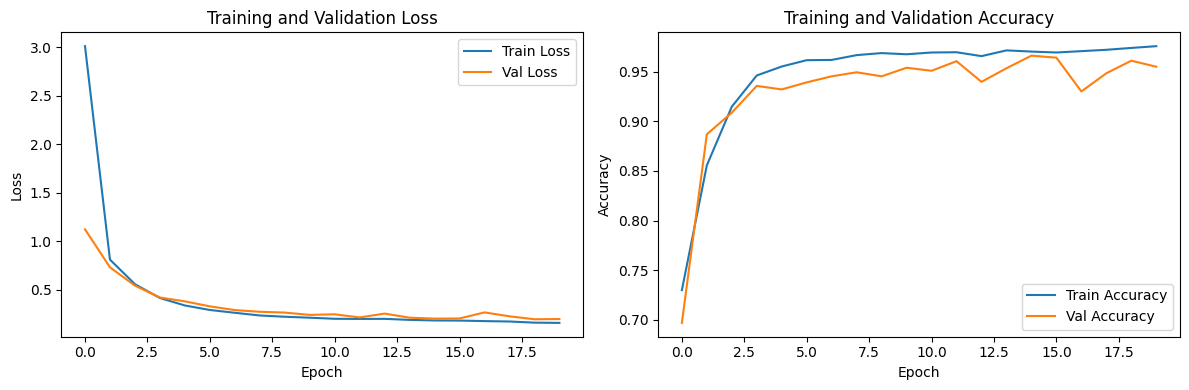


🎉 Done!


In [29]:

# ========================
# 4. EVALUATION
# ========================
print("\n📊 Evaluating on test set...")

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# Make predictions
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

# Calculate metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("\n📈 Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Different', 'Same']))

print("\n🎯 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print(f"\n🔥 ROC AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")

# ========================
# 5. PLOT TRAINING HISTORY
# ========================
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()

print("\n🎉 Done!")

# Save the model

In [30]:
# Save model in .keras format
model.save('face_verification_mlp.keras')

print("✅ Model saved as 'face_verification_mlp.keras'")


✅ Model saved as 'face_verification_mlp.keras'


In [31]:
from google.colab import drive
import shutil

# 1. Mount Google Drive
drive.mount('/content/drive')

# 2. Save your model locally in .keras format
model.save('face_verification_mlp.keras')
print("✅ Model saved locally as 'face_verification_mlp.keras'")

# 3. Copy the model to your Google Drive
dst_path = '/content/drive/MyDrive/face_verification_mlp.keras'
shutil.copy('face_verification_mlp.keras', dst_path)

print(f"✅ Model also saved to Drive at: {dst_path}")


Mounted at /content/drive
✅ Model saved locally as 'face_verification_mlp.keras'
✅ Model also saved to Drive at: /content/drive/MyDrive/face_verification_mlp.keras
